In [ ]:
# Modelo de Data Science com previsão de faturamento. No caso esta empresa esta investindo em mil em anuncios em TV, Rádio e Jornal, e faturando vendas em Milhões.

In [4]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn


In [2]:
import pandas as pd

df = pd.read_csv("advertising.csv")
display(df)
print(df.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


Matplotlib is building the font cache; this may take a moment.


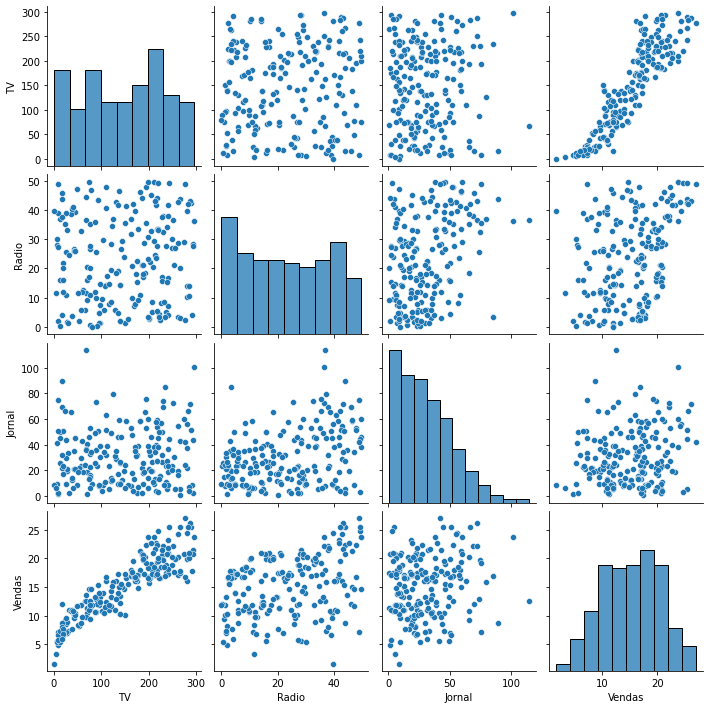

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

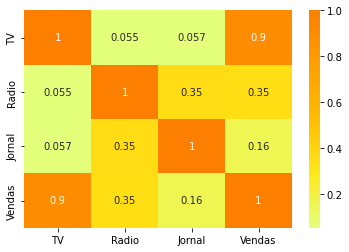

In [6]:
sns.heatmap(df.corr(), cmap = 'Wistia', annot =True)
plt.show()

In [18]:
y = df["Vendas"]
x = df[["TV", "Radio", "Jornal"]]

In [19]:
from sklearn.model_selection import train_test_split
x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R² da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {r2_lin}")
r2_rf=metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R² da Random Force: {r2_rf}")
print(f"RSME da Random Force: {rmse_rf}")

R² da Regressão Linear: 0.9071151423684273
RSME da Regressão Linear: 0.9071151423684273
R² da Random Force: 0.9630265758276662
RSME da Random Force: 0.9714199315091983


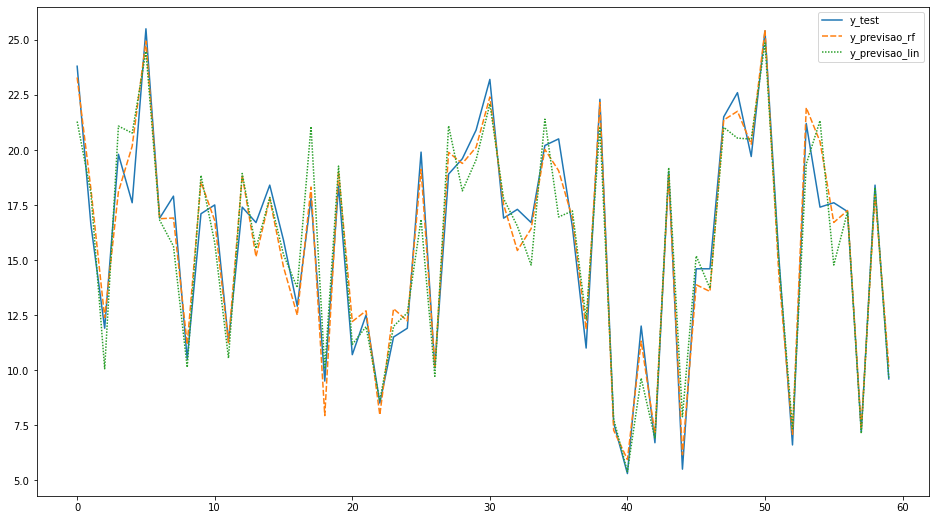

,y_test,y_previsao_rf,y_previsao_lin
0,23.8,23.290,21.288161
1,16.6,18.223,18.042132
2,11.9,12.382,10.059590
3,19.8,18.099,21.082241
4,17.6,20.170,20.764760
5,25.5,24.940,24.471874
6,16.9,16.874,16.806436
7,17.9,16.907,15.628857
8,10.5,11.167,10.124799
9,17.1,18.550,18.846019


In [22]:
df_resultado = pd.DataFrame()
df_resultado['y_test'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(16, 9))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

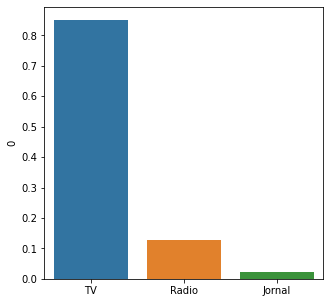

In [24]:
importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(5, 5))
sns.barplot(x=importancia_features.index, y=importancia_features[0])
plt.show()

In [30]:
import pandas as pd

novos = pd.read_csv("novos.csv")
display(novos)

previsao = rf_reg.predict(novos)
display(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


array([ 7.477,  8.688, 20.283])